In [2]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [3]:
file_BKG = up.open("radioactivity_userfile_7days.root")
file_IBD = up.open('ibd_userfile_7days.root')

dataset_IBD = file_IBD['TRec'].arrays(library = 'np')
dataset_BKG = file_BKG['TRec'].arrays(library = 'np')

Dataset è un DICT di NUMPY ARRAY

In [4]:
print(dataset_IBD["m_QEn"].shape)
print(dataset_BKG["m_QEn"].shape)

print(dataset_BKG["m_QEn"].shape[0]+dataset_IBD["m_QEn"].shape[0])

(704,)
(61870091,)
61870795


# Here some try

In [5]:
print([i for i in (1,2) if i == 1])
  

[1]


In [6]:
a = np.array([[1, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=1)

array([[1, 4, 5, 6]])

In [7]:
def combine_dict(d1, d2):
    combined = {}
    for k in set(d1.keys()) | set(d2.keys()):
        if k in d1 and k in d2 and isinstance(d1[k], np.ndarray) and isinstance(d2[k], np.ndarray):
            combined[k] = np.concatenate([d1[k], d2[k]])
        elif k in d1:
            combined[k] = d1[k]
        else:
            combined[k] = d2[k]
    
    provenienza = np.concatenate([np.full_like(d1.get(k, []), 1), np.full_like(d2.get(k, []), 0)])
    return {**combined, 'provenienza': provenienza}

#Prova dict 
dict1 = {'t': np.array([1,2,3]), 
         'E': np.array([3,4,5])}

dict2 = {'t': np.array([4,3,1]), 
         'E': np.array([5,2,2])}

combine_dict(dict1,dict2)

{'E': array([3, 4, 5, 5, 2, 2]),
 't': array([1, 2, 3, 4, 3, 1]),
 'provenienza': array([1, 1, 1, 0, 0, 0])}

In [8]:
combine_dict(dataset_IBD,dataset_BKG)["m_QEn"].shape

(61870795,)

In [9]:
all_data = combine_dict(dataset_IBD,dataset_BKG)

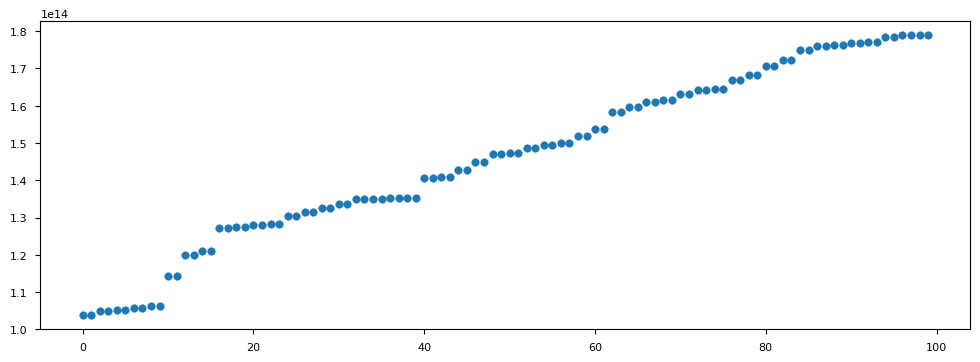

In [10]:
fig, ax = plt.subplots(figsize= (12,4))
ax.scatter(np.arange(100), all_data['m_triggerT'][100:200])

### Now I'll sort the data in temporal order

In [11]:
dicta = {'a': np.array([4.3, 2.2, 12.2, 3.1]), 'b': np.array([9, 6, 7, 8]), 'c': np.array([5, 10, 12, 11])}


Uso la funzione sort di Numpy

In [12]:
sorted_a = np.sort(dicta['a'])
sorted_a


array([ 2.2,  3.1,  4.3, 12.2])

Usa la funzione argsort di numpy per ottenere gli indici degli elementi ordinati nell'array originale:

In [13]:
idx = dicta['a'].argsort()
idx


array([1, 3, 0, 2])

In [14]:
for key in dicta.keys():
    dicta[key] = dicta[key][idx]


In [15]:
print(dicta)

{'a': array([ 2.2,  3.1,  4.3, 12.2]), 'b': array([6, 8, 9, 7]), 'c': array([10, 11,  5, 12])}


# Now for the dataset

In [16]:
ord_idx = all_data["m_triggerT"].argsort()
ord_idx

array([     704,      705,      706, ..., 61870792, 61870793, 61870794])

In [17]:
for key in all_data.keys():
    all_data[key] = all_data[key][ord_idx]

In [18]:
print(all_data["m_triggerT"])

[1.71921000e+06 1.51135350e+07 1.71738090e+07 ... 6.04799982e+14
 6.04799998e+14 6.04799999e+14]


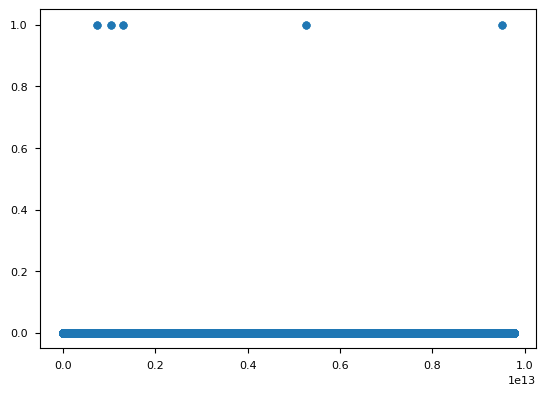

In [30]:
plt.scatter(all_data["m_triggerT"][:1000000], all_data["provenienza"][:1000000])